In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib inline

In [3]:
df = pd.read_excel('C:/Users/ABDO/Downloads/sample_-_superstore.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Data exploring

In [21]:
df['Sales'].describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

In [22]:
df['Profit'].describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

In [5]:
columns = df.columns
columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [23]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


#### Searching for duplicates

In [32]:
df.duplicated().sum()

0

#### Searching for nulls

In [34]:
df.isnull().sum().sum()

0

### Categories' comparison

In [38]:
categories = df.groupby('Category').sum()
x_axes = categories.index

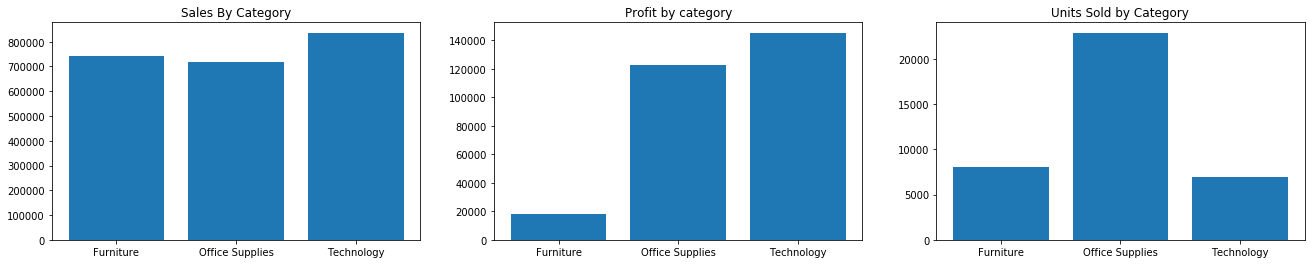

In [50]:
fig, (ax, ax1, ax2) = plt.subplots(nrows=1,ncols=3)
# plt.figure(figsize=(1000,4000))
ax.bar(x_axes, categories['Sales'])
# ax.set_ylabel('Sales')
ax.set_title('Sales By Category')

ax1.bar(x_axes, categories['Profit'])
ax1.set_title('Profit by category')

ax2.bar(x_axes, categories['Quantity'])
ax2.set_title('Units Sold by Category')
plt.subplots_adjust(left=.1,right=3)
plt.show()


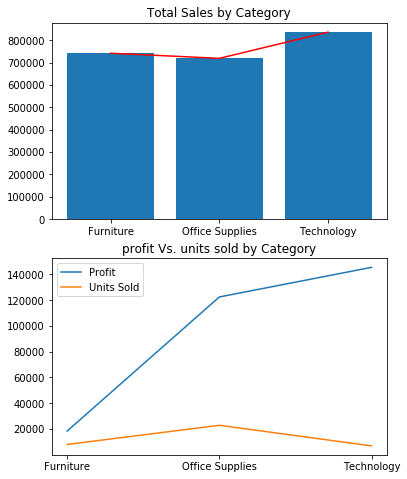

In [57]:
fig, (ax, ax1) = plt.subplots(nrows=2,ncols=1)
# plt.figure(figsize=(50,90))
ax.bar(x_axes,categories['Sales'], label='Sales')
ax.plot(categories['Sales'],color='r')
ax.set_title('Total Sales by Category')
ax1.plot(categories['Profit'], label='Profit')
ax1.plot(categories['Quantity'], label='Units Sold')
ax1.set_title('profit Vs. units sold by Category')
plt.legend()
plt.subplots_adjust(top=2,bottom=.5)
plt.show()

### By region comaprison

In [58]:
regions = df.groupby('Region').sum()
region_names = regions.index
region_names

Index(['Central', 'East', 'South', 'West'], dtype='object', name='Region')

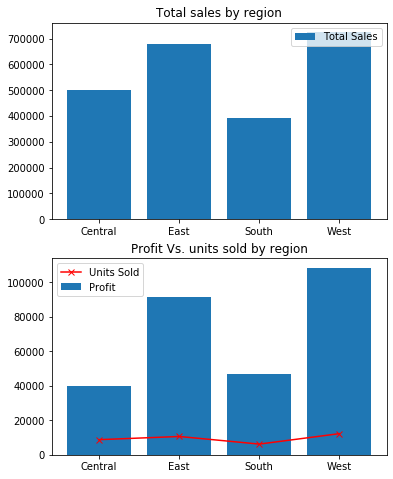

In [77]:
fig, (ax, ax1) = plt.subplots(nrows=2, ncols=1)
ax.bar(region_names, regions['Sales'], label='Total Sales')
ax.set_title('Total sales by region')
ax1.bar(region_names,regions['Profit'], label='Profit')
ax1.plot(regions['Quantity'],marker='x',c='r',label='Units Sold')
ax1.set_title('Profit Vs. units sold by region')
ax.legend()
ax1.legend(loc='upper left')
plt.subplots_adjust(top=2,bottom=.5)
plt.show()

In [61]:
shipment_categories = df.groupby('Category').sum()

In [62]:
shipment_categories

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Category,,,,,,
Furniture,10693326,118196026,741999.7953,8028,368.89,18451.2728
Office Supplies,30010535,330772872,719047.0320,22906,947.80,122490.8008
Technology,9241154,102603754,836154.0330,6939,244.40,145454.9481


## Digging deeper in products

In [84]:
products = df.groupby('Sub-Category')

In [87]:
products['Sales', 'Quantity', 'Profit'].sum()

,Sales,Quantity,Profit
Sub-Category,,,
Accessories,167380.3180,2976,41936.6357
Appliances,107532.1610,1729,18138.0054
Art,27118.7920,3000,6527.7870
Binders,203412.7330,5974,30221.7633
Bookcases,114879.9963,868,-3472.5560
Chairs,328449.1030,2356,26590.1663
Copiers,149528.0300,234,55617.8249
Envelopes,16476.4020,906,6964.1767
Fasteners,3024.2800,914,949.5182


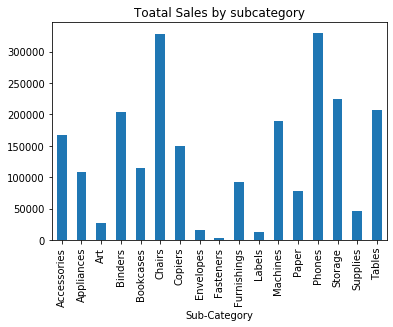

In [98]:
products['Sales'].sum().plot(kind='bar').set_title('Toatal Sales by subcategory')
plt.figure.figsize=(50,200)
plt.show()

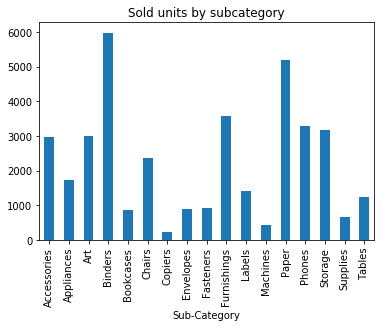

In [99]:
products['Quantity'].sum().plot(kind='bar').set_title('Sold units by subcategory')
plt.figure.figsize=(50,200)
plt.show()

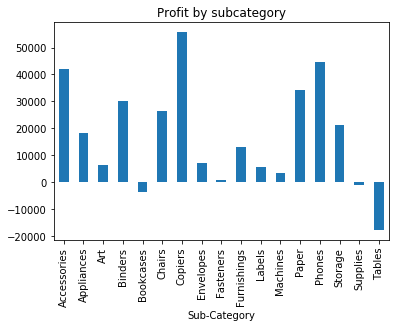

In [100]:
products['Profit'].sum().plot(kind='bar').set_title('Profit by subcategory')
plt.figure.figsize=(50,200)
plt.show()

### It is obvious that we have loss in 3 subcategories

In [108]:
mask = products.sum()['Profit'] < 0
loss_sub_categories[mask]

Sub-Category
Bookcases    True
Supplies     True
Tables       True
Name: Profit, dtype: bool

## Bookcases, Supplies and Tables cost the company a loss
### Why?
### Should we stop production?
### What are our alternatives?

# Customers analysis

In [112]:
# Customer types
customer_types = df.groupby('Segment')

In [116]:
customer_types['Sales','Quantity', 'Profit'].sum()

,Sales,Quantity,Profit
Segment,,,
Consumer,1.161401e+06,19521,134119.2092
Corporate,7.061464e+05,11608,91979.1340
Home Office,4.296531e+05,6744,60298.6785


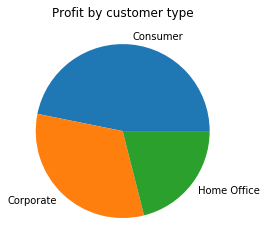

In [128]:
ax = plt.pie(customer_types['Profit'].sum(),labels=customer_types.indices)
# plt.legend()
plt.title('Profit by customer type')
plt.show()

In [134]:
customers_groups = df.groupby('Customer Name')

In [137]:
customers = customers_groups['Sales','Quantity', 'Profit'].sum()
customers

,Sales,Quantity,Profit
Customer Name,,,
Aaron Bergman,886.156,13,129.3465
Aaron Hawkins,1744.700,54,365.2152
Aaron Smayling,3050.692,48,-253.5746
Adam Bellavance,7755.620,56,2054.5885
Adam Hart,3250.337,75,281.1890
...,...,...,...
Xylona Preis,2374.658,100,621.2300
Yana Sorensen,6720.444,58,1778.2923
Yoseph Carroll,5454.350,31,1305.6290


In [139]:
customers.sort_values(by='Profit')

,Sales,Quantity,Profit
Customer Name,,,
Cindy Stewart,5690.055,40,-6626.3895
Grant Thornton,9351.212,26,-4108.6589
Luke Foster,3930.509,69,-3583.9770
Sharelle Roach,3233.481,34,-3333.9144
Henry Goldwyn,3247.642,68,-2797.9635
...,...,...,...
Adrian Barton,14473.571,73,5444.8055
Hunter Lopez,12873.298,50,5622.4292
Sanjit Chand,14142.334,87,5757.4119
